LSTM and CNN

Muyo, Mark Danielle L. <br>


## Load the dataset and examine it.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
filepath = '/content/drive/MyDrive/IBM_2006-01-01_to_2018-01-01.csv'

In [ ]:
data = pd.read_csv(filepath, parse_dates=[0], index_col=0)

idx = pd.date_range('2006-01-03', '2017-12-29')

data.index = pd.DatetimeIndex(data.index)
data = data.reindex(idx, fill_value='NaN')
print(data)

              Open    High     Low   Close    Volume Name
2006-01-03   82.45   82.55   80.81   82.06  11715200  IBM
2006-01-04    82.2    82.5   81.33   81.95   9840600  IBM
2006-01-05    81.4    82.9    81.0    82.5   7213500  IBM
2006-01-06   83.95   85.03   83.41   84.95   8197400  IBM
2006-01-07     NaN     NaN     NaN     NaN       NaN  NaN
...            ...     ...     ...     ...       ...  ...
2017-12-25     NaN     NaN     NaN     NaN       NaN  NaN
2017-12-26  152.51  153.86   152.5  152.83   2479017  IBM
2017-12-27  152.95  153.18  152.61  153.13   2149257  IBM
2017-12-28   153.2  154.12   153.2  154.04   2687624  IBM
2017-12-29  154.17  154.72  153.42  153.42   3327087  IBM

[4379 rows x 6 columns]


In [ ]:
data = data.drop(columns=['Name']).astype(float)

## Check for missing values

In [ ]:
data.head()

,Open,High,Low,Close,Volume
2006-01-03,82.45,82.55,80.81,82.06,11715200.0
2006-01-04,82.20,82.50,81.33,81.95,9840600.0
2006-01-05,81.40,82.90,81.00,82.50,7213500.0
2006-01-06,83.95,85.03,83.41,84.95,8197400.0
2006-01-07,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.tail()

,Open,High,Low,Close,Volume
2017-12-25,NaN,NaN,NaN,NaN,NaN
2017-12-26,152.51,153.86,152.50,152.83,2479017.0
2017-12-27,152.95,153.18,152.61,153.13,2149257.0
2017-12-28,153.20,154.12,153.20,154.04,2687624.0
2017-12-29,154.17,154.72,153.42,153.42,3327087.0


In [ ]:
data.isnull().sum()

Open      1360
High      1359
Low       1360
Close     1359
Volume    1359
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4379 entries, 2006-01-03 to 2017-12-29
Freq: D
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3020 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3020 non-null   float64
 4   Volume  3020 non-null   float64
dtypes: float64(5)
memory usage: 205.3 KB


## Satisfy the following condition: Training set (before 2017) and Test set (2017 and beyond)

In [ ]:
train_df = data[data.index[0]:'2016-12-31']
test_df = data['2017-01-01':data.index[-1]]

In [ ]:
train_df.head()

,Open,High,Low,Close,Volume
2006-01-03,82.45,82.55,80.81,82.060000,11715200.0
2006-01-04,82.20,82.50,81.33,81.950000,9840600.0
2006-01-05,81.40,82.90,81.00,82.500000,7213500.0
2006-01-06,83.95,85.03,83.41,84.950000,8197400.0
2006-01-07,84.00,84.77,83.40,84.543333,7751000.0


In [ ]:
test_df.head()

,Open,High,Low,Close,Volume
2017-01-01,166.72,167.2850,165.7550,166.59,2943562.0
2017-01-02,166.86,167.5775,165.8825,166.89,2938930.5
2017-01-03,167.00,167.8700,166.0100,167.19,2934299.0
2017-01-04,167.77,169.8700,167.3600,169.26,3381432.0
2017-01-05,169.25,169.3900,167.2600,168.70,2682301.0


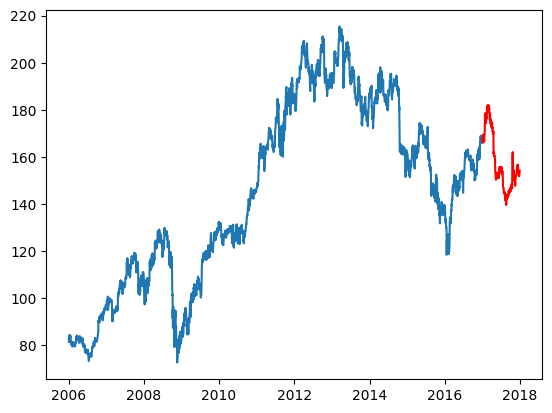

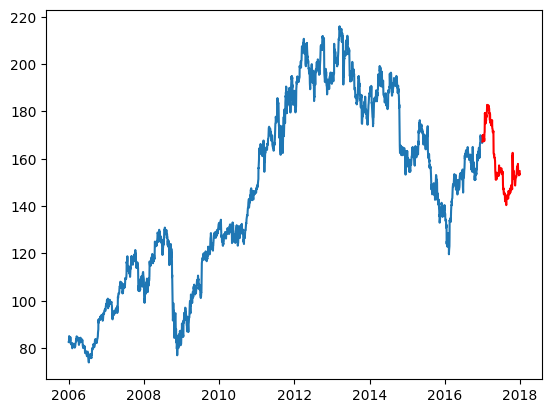

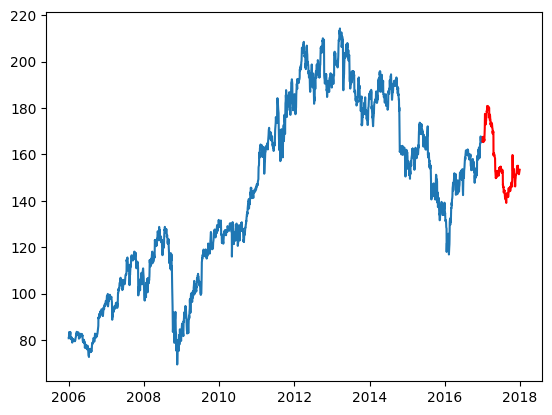

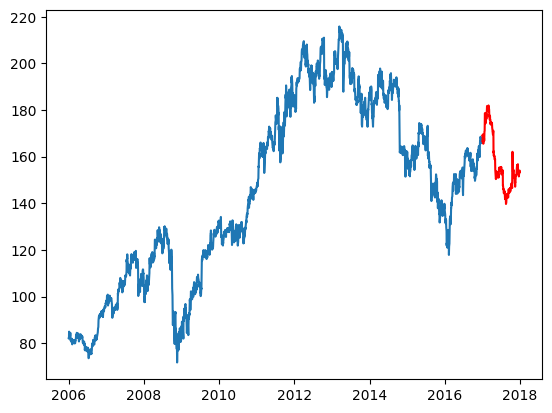

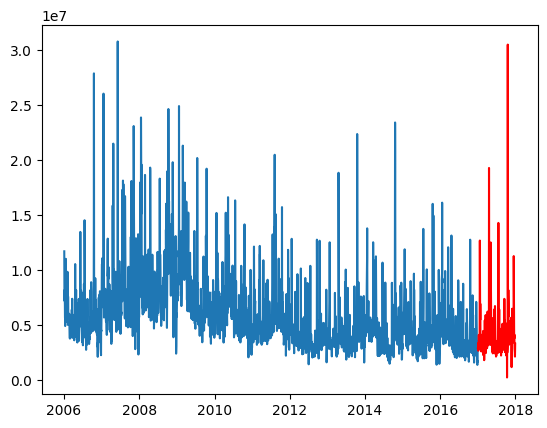

In [ ]:
import matplotlib.pyplot as plt

for column in data.columns:
  plt.plot(train_df[column])
  plt.plot(test_df[column], color='red')
  plt.show()

# Scale the training set from 0 to 1. Use MinMaxScaler and fit_transform function to do this.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train = scaler.fit_transform(train_df['Close'].values.reshape(-1,1))
test = scaler.fit_transform(test_df['Close'].values.reshape(-1,1))

In [ ]:
train_df['Close'].values.reshape(-1,1)

array([[ 82.06],
       [ 81.95],
       [ 82.5 ],
       ...,
       [166.6 ],
       [165.99],
       [166.29]])

In [ ]:
import numpy as np

def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
      a = dataset[i:(i+look_back), 0]
      dataX.append(a)
      dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
columns_to_scale = ['Open', 'High', 'Low', 'Close', 'Volume']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training set
train_set_scaled = scaler.fit_transform(train_df[columns_to_scale])

# Convert the scaled data back to a DataFrame
train_set_scaled = pd.DataFrame(train_set_scaled, columns=columns_to_scale)

# Print the scaled training set
print(train_set_scaled)

          Open      High       Low     Close    Volume
0     0.068073  0.060651  0.078108  0.071637  0.351221
1     0.066321  0.060299  0.081699  0.070873  0.287408
2     0.060712  0.063116  0.079420  0.074691  0.197981
3     0.078589  0.078121  0.096064  0.091698  0.231473
4     0.078940  0.076289  0.095994  0.088875  0.216277
...        ...       ...       ...       ...       ...
4011  0.660684  0.662440  0.672307  0.662224  0.000000
4012  0.662858  0.660750  0.666436  0.655630  0.012256
4013  0.653954  0.655466  0.666436  0.658476  0.009058
4014  0.656898  0.653423  0.662983  0.654241  0.052945
4015  0.657880  0.655484  0.663864  0.656324  0.052788

[4016 rows x 5 columns]


## LSTM stores long-term memory states. To do this, create a data structure with 60 timesteps and 1 output. Thus, for each element of the training set, we shall have 60 previous training set elements.

In [ ]:
import numpy as np

columns_to_use = ['Open', 'High', 'Low', 'Close', 'Volume']

X_train = []
y_train = []

for i in range(60, len(train_df)):
    X_train.append(train_df[columns_to_use].values[i-60:i])
    y_train.append(train_df['Close'].values[i])

X_train = np.array(X_train)
y_train = np.array(y_train)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (3956, 60, 5)
y_train shape: (3956,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


# create and fit the LSTM network
model = Sequential()
model.add(LSTM(8, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=32, batch_size=32, verbose=1)

Epoch 1/32
124/124 [==============================] - 4s 6ms/step - loss: 0.0184
Epoch 2/32
124/124 [==============================] - 1s 5ms/step - loss: 0.0020
Epoch 3/32
124/124 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 4/32
124/124 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 5/32
124/124 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 6/32
124/124 [==============================] - 0s 4ms/step - loss: 8.8223e-04
Epoch 7/32
124/124 [==============================] - 0s 4ms/step - loss: 7.5975e-04
Epoch 8/32
124/124 [==============================] - 0s 4ms/step - loss: 6.8341e-04
Epoch 9/32
124/124 [==============================] - 0s 3ms/step - loss: 6.5553e-04
Epoch 10/32
124/124 [==============================] - 0s 4ms/step - loss: 6.0734e-04
Epoch 11/32
124/124 [==============================] - 0s 3ms/step - loss: 5.7680e-04
Epoch 12/32
124/124 [==============================] - 0s 3ms/step - loss: 5.5388e-

In [ ]:
predictions = model.predict(testX)

10/10 [==============================] - 1s 4ms/step


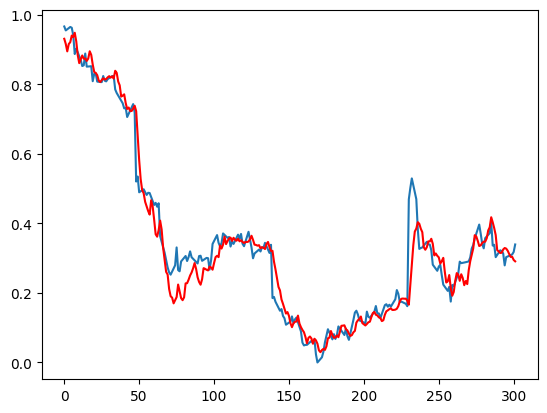

In [ ]:
plt.plot(testY)
plt.plot(predictions, color='red')
plt.show()

## Reshape the X_train for efficient modeling

In [ ]:
# reshape into X=t and Y=t+1
look_back = 60
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
columns_to_use = ['Open', 'High', 'Low', 'Close', 'Volume']

X_train = []
y_train = []

for i in range(60, len(train_df)):
    X_train.append(train_df[columns_to_use].values[i-60:i])
    y_train.append(train_df['Close'].values[i])

X_train = np.array(X_train)
y_train = np.array(y_train)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], len(columns_to_use))

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("Reshaped X_train shape:", X_train.shape)

X_train shape: (3956, 60, 5)
y_train shape: (3956,)
Reshaped X_train shape: (3956, 60, 5)


## Conclusion

This project focuses on building data models for time series forecasting using Long-Short Term Memory (LSTM) and Convolutional Neural Network (CNN) models The first step is to load and check the data model if it has any missing values. The data set is then divided into two parts: a training set consisting of data before 2017, and a test set with data from 2017 and beyond. This separation allows the model to be trained on historical data and tested on recent unobserved data. It is scaled from 0 to 1 using the MinMaxScaler and fit_transform functions to adjust the training set. This scaling ensures that the features have a consistent scale, which can improve the performance of neural network models. Then, a data structure with 60 time steps and 1 output is constructed. By including 60 features of the training set for each feature in the training set, the model can learn from the temporal patterns in the data.
The X_train data are reconstructed to ensure efficient sampling. This step may modify the data to match the expected input size of the LSTM or CNN model, which often requires a specific size for the input data After completing this preprocessing step, the data set is converted to a format suitable for training and Evaluation of LSTM and CNN models for time series forecasting tasks.